In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD

In [2]:
Datadir="C:/Users/prasa/Desktop/ML/ML_projects/Images"
categories=["Middle","PowerGrasp","Little","Index","Ring","Thumb"]
cat=categories[0]
str(cat)

'Middle'

In [3]:
training_data=[]
img_size=32
def create_training_data():
    path=os.path.join(Datadir,cat)
    class_num=categories.index(cat)
    for i in range(1,110):
      #print(os.path.join(path,str(categories[0])+" "+str(i)+".jpg"))
        img_array=cv2.imread(os.path.join(path,str(cat)+" "+str(i)+".jpg"))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])

In [4]:
import os
import cv2
create_training_data()

In [5]:
X=[]
Y=[]
for features,labels in training_data:
    X.append(features)
    Y.append(labels)


In [6]:
X=np.array(X).reshape(-1,img_size,img_size,3)

In [7]:
image_shape = (32, 32, 3)
latent_dimensions = 100

In [8]:
X.shape

(109, 32, 32, 3)

In [9]:
def build_generator():
        model = Sequential()
        model.add(Dense(128 * 8 * 8, activation="relu",input_dim=latent_dimensions))
        model.add(Reshape((8, 8, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.78))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.78))
        model.add(Activation("relu"))
        model.add(Conv2D(3, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))
        noise = Input(shape=(latent_dimensions,))
        image = model(noise)
        
        return Model(noise, image)

In [10]:
def build_discriminator():
        model = Sequential()
        model.add(Conv2D(32, kernel_size=3, strides=2,input_shape=image_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.82))
        model.add(LeakyReLU(alpha=0.25))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.82))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.25))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        image = Input(shape=image_shape)
        validity = model(image)
        return Model(image, validity)


In [11]:
def display_images():
        r, c = 4,4
        noise = np.random.normal(0, 1, (r * c,latent_dimensions))
        generated_images = generator.predict(noise)
        generated_images = 0.5 * generated_images + 0.5
        fig, axs = plt.subplots(r, c)
        count = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(generated_images[count, :,:,])
                axs[i,j].axis('off')
                count += 1
        plt.show()
        plt.close()

In [12]:
X.shape

(109, 32, 32, 3)

In [13]:

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002,0.5),
                    metrics=['accuracy'])
discriminator.trainable = False
generator = build_generator()
z = Input(shape=(latent_dimensions,))
image = generator(z)
valid = discriminator(image)

combined_network = Model(z, valid)
combined_network.compile(loss='binary_crossentropy',
                         optimizer=Adam(0.0002,0.5))

1/1 [==============================] - 0s 103ms/step


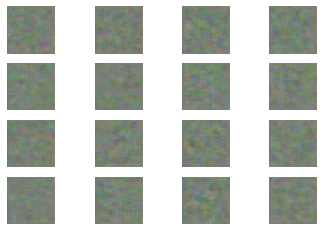

1/1 [==============================] - 0s 33ms/step


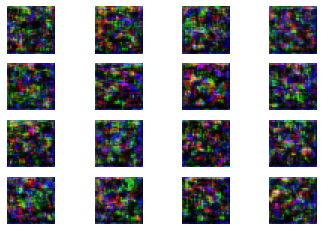

1/1 [==============================] - 0s 30ms/step


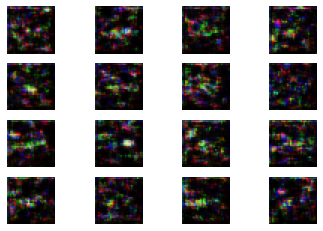

1/1 [==============================] - 0s 30ms/step


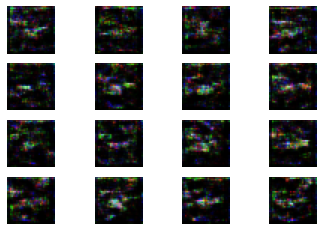

1/1 [==============================] - 0s 30ms/step


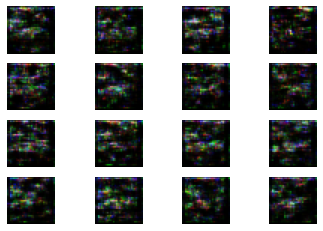

1/1 [==============================] - 0s 40ms/step


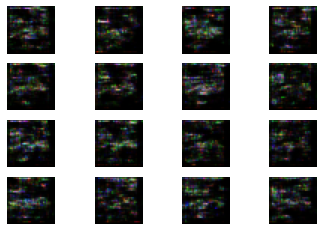

1/1 [==============================] - 0s 40ms/step


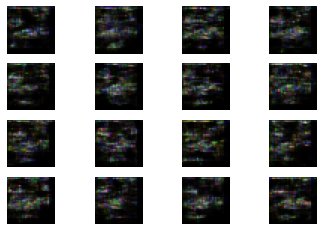

1/1 [==============================] - 0s 31ms/step


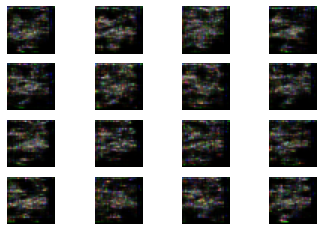

1/1 [==============================] - 0s 37ms/step


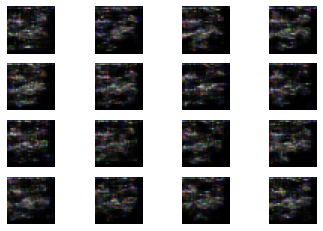

1/1 [==============================] - 0s 30ms/step


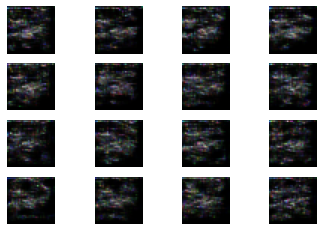

1/1 [==============================] - 0s 40ms/step


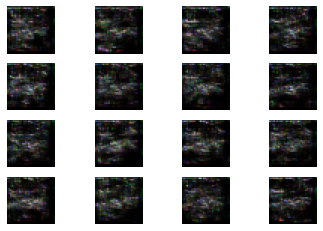

1/1 [==============================] - 0s 30ms/step


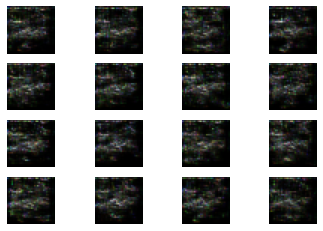

1/1 [==============================] - 0s 30ms/step


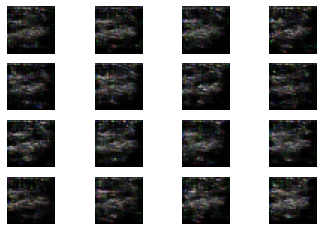

1/1 [==============================] - 0s 35ms/step


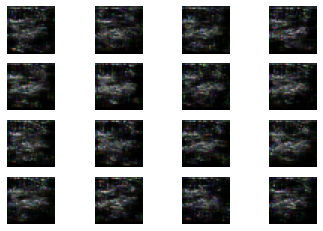

1/1 [==============================] - 0s 44ms/step


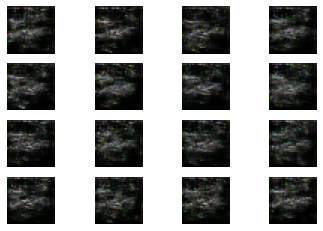

1/1 [==============================] - 0s 30ms/step


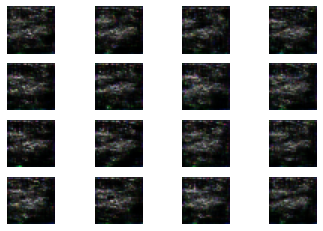

1/1 [==============================] - 0s 40ms/step


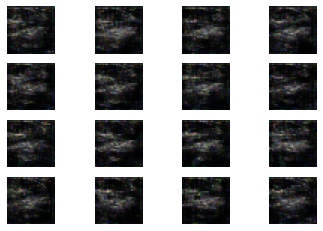

1/1 [==============================] - 0s 40ms/step


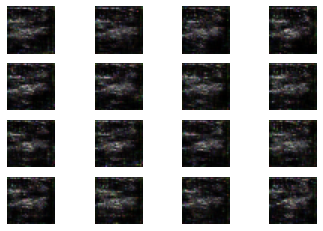

1/1 [==============================] - 0s 30ms/step


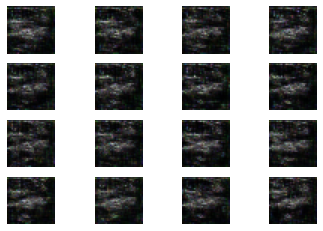

1/1 [==============================] - 0s 40ms/step


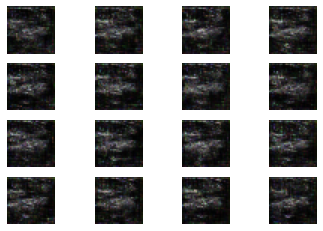

1/1 [==============================] - 0s 40ms/step


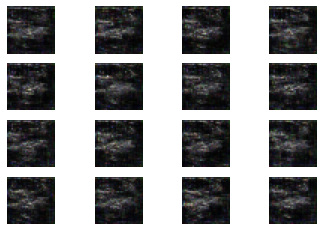

1/1 [==============================] - 0s 30ms/step


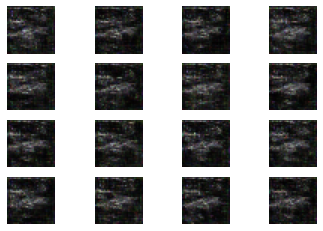

1/1 [==============================] - 0s 40ms/step


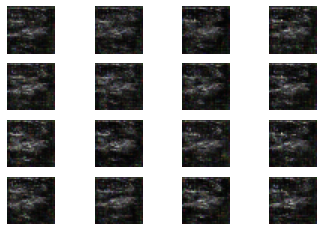

1/1 [==============================] - 0s 43ms/step


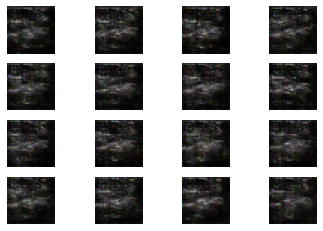

1/1 [==============================] - 0s 30ms/step


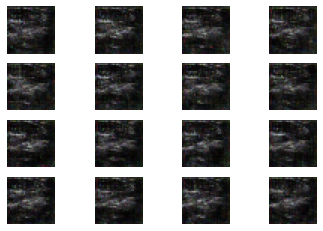

1/1 [==============================] - 0s 40ms/step


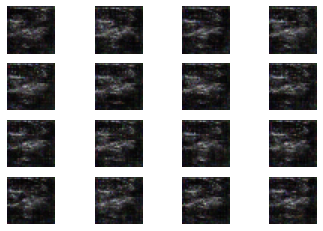

1/1 [==============================] - 0s 40ms/step


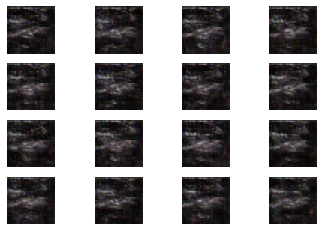

1/1 [==============================] - 0s 36ms/step


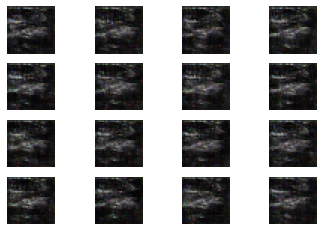

1/1 [==============================] - 0s 30ms/step


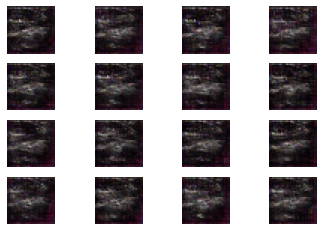

1/1 [==============================] - 0s 30ms/step


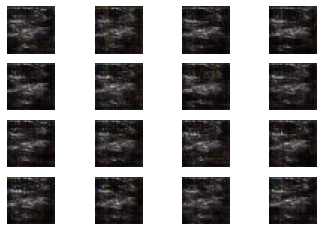

1/1 [==============================] - 0s 31ms/step


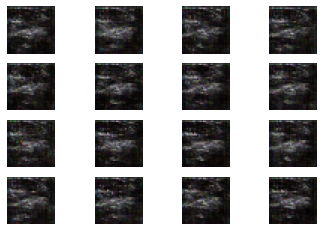

1/1 [==============================] - 0s 40ms/step


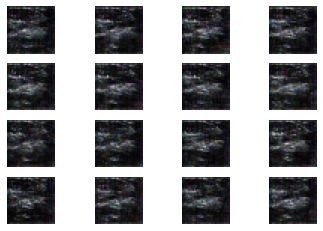

1/1 [==============================] - 0s 30ms/step


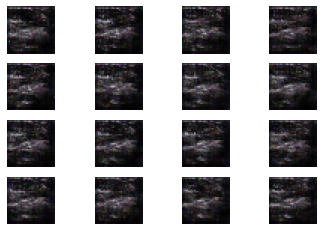

1/1 [==============================] - 0s 37ms/step


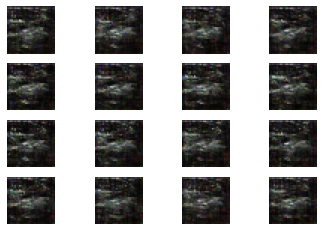

1/1 [==============================] - 0s 50ms/step


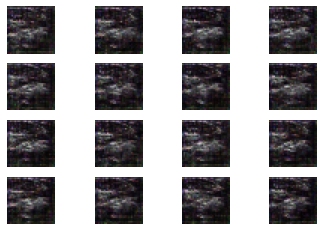

1/1 [==============================] - 0s 40ms/step


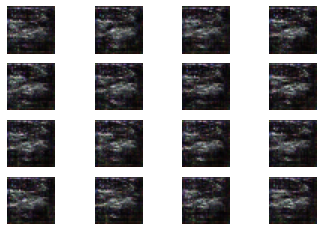

1/1 [==============================] - 0s 30ms/step


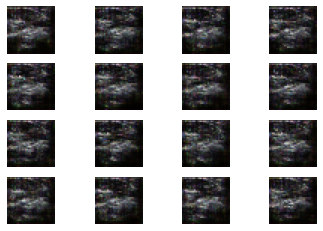

1/1 [==============================] - 0s 50ms/step


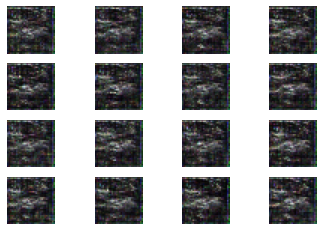

1/1 [==============================] - 0s 50ms/step


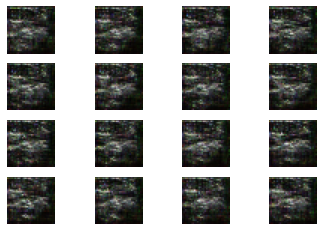

1/1 [==============================] - 0s 40ms/step


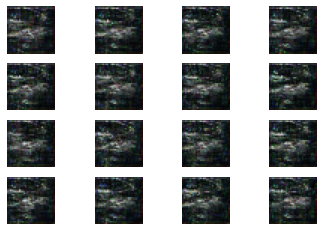

1/1 [==============================] - 0s 40ms/step


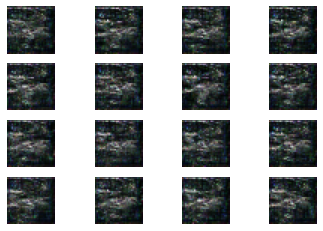

1/1 [==============================] - 0s 40ms/step


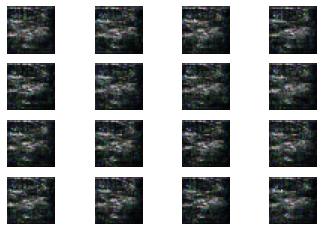

1/1 [==============================] - 0s 40ms/step


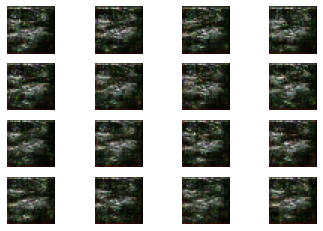

1/1 [==============================] - 0s 40ms/step


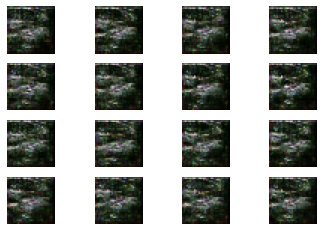

1/1 [==============================] - 0s 40ms/step


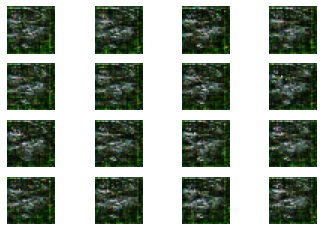

1/1 [==============================] - 0s 50ms/step


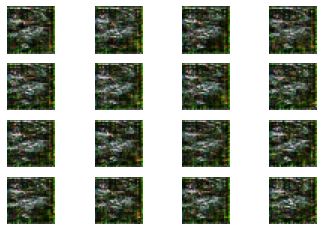

1/1 [==============================] - 0s 30ms/step


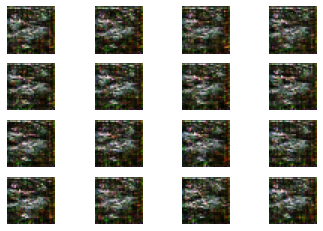

1/1 [==============================] - 0s 40ms/step


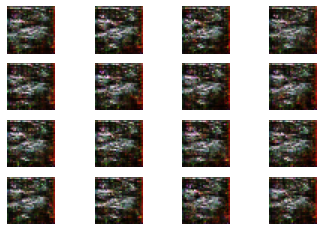

1/1 [==============================] - 0s 40ms/step


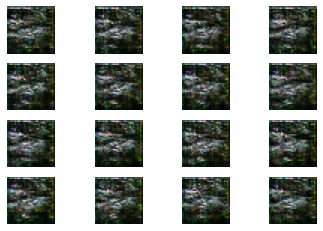

1/1 [==============================] - 0s 40ms/step


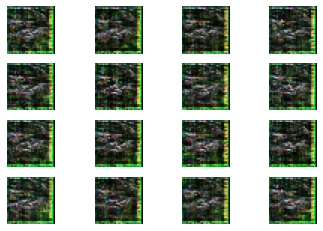

1/1 [==============================] - 0s 40ms/step


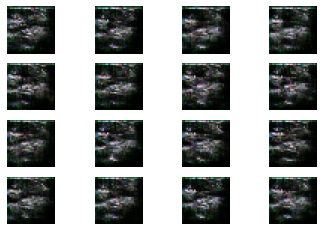

1/1 [==============================] - 0s 40ms/step


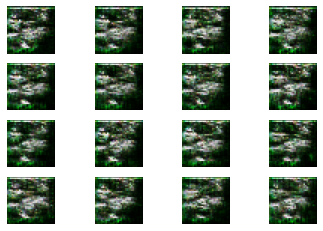

1/1 [==============================] - 0s 30ms/step


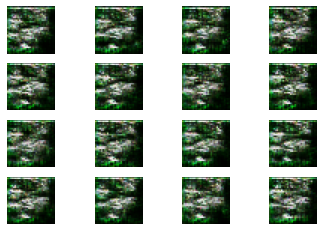

1/1 [==============================] - 0s 40ms/step


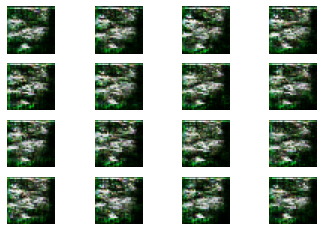

1/1 [==============================] - 0s 40ms/step


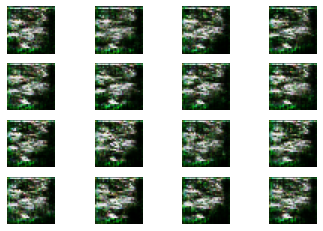

1/1 [==============================] - 0s 40ms/step


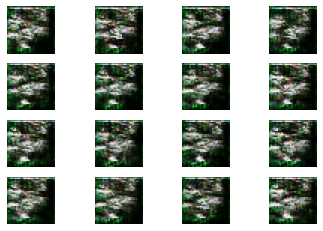

1/1 [==============================] - 0s 50ms/step


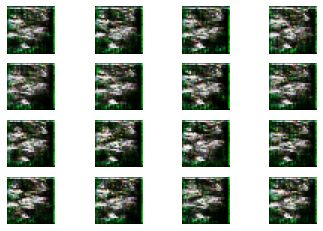

1/1 [==============================] - 0s 40ms/step


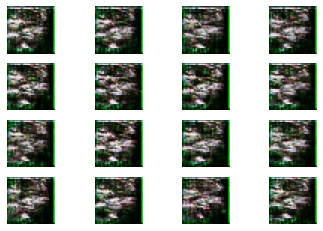

1/1 [==============================] - 0s 40ms/step


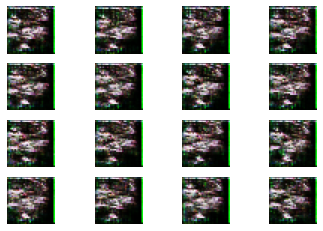

1/1 [==============================] - 0s 50ms/step


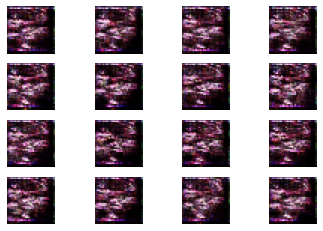

1/1 [==============================] - 0s 50ms/step


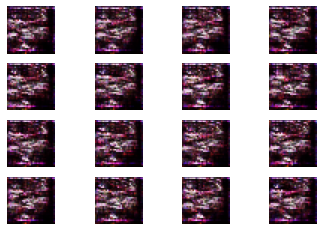

1/1 [==============================] - 0s 40ms/step


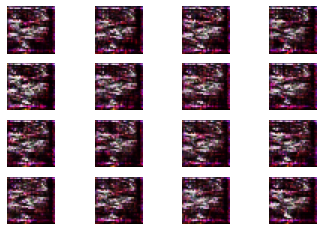

1/1 [==============================] - 0s 50ms/step


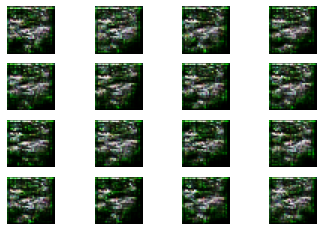

1/1 [==============================] - 0s 50ms/step


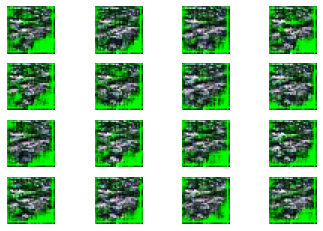

1/1 [==============================] - 0s 40ms/step


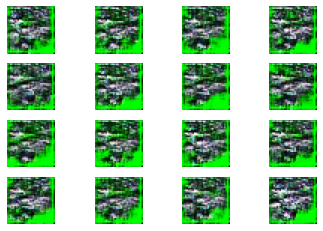

1/1 [==============================] - 0s 50ms/step


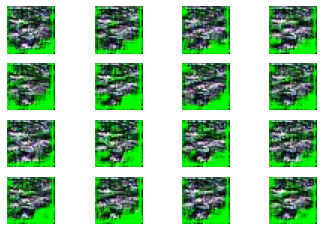

1/1 [==============================] - 0s 60ms/step


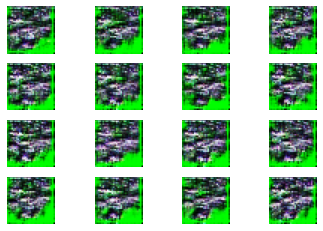

1/1 [==============================] - 0s 60ms/step


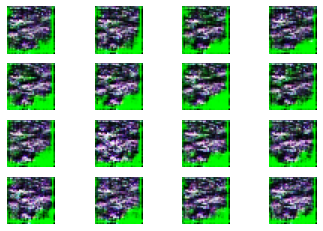

1/1 [==============================] - 0s 50ms/step


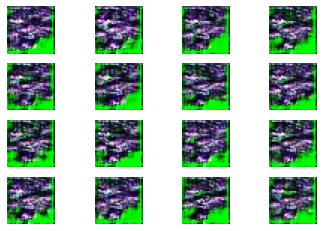

1/1 [==============================] - 0s 50ms/step


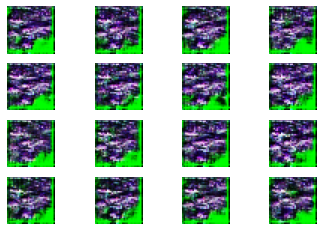

1/1 [==============================] - 0s 50ms/step


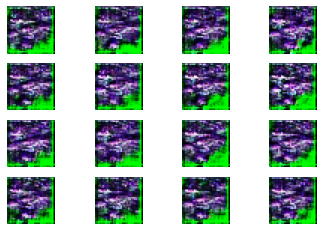

1/1 [==============================] - 0s 50ms/step


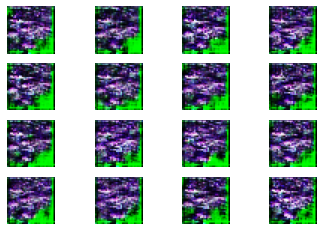

1/1 [==============================] - 0s 50ms/step


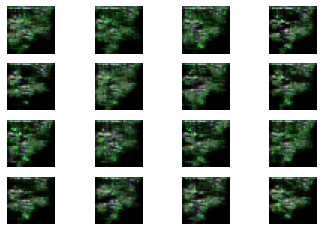

1/1 [==============================] - 0s 50ms/step


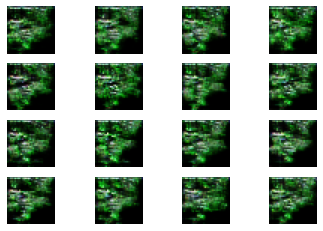

1/1 [==============================] - 0s 50ms/step


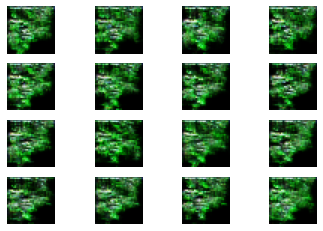

1/1 [==============================] - 0s 80ms/step


In [ ]:
num_epochs=15000
batch_size=32
display_interval=25
losses=[]
  
#Normalizing the input
X = (X / 127.5) - 1.
          
  
#Defining the Adversarial ground truths
valid = np.ones((batch_size, 1))
  
#Adding some noise 
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)
  
for epoch in range(num_epochs):
              
            #Training the Discriminator
              
            #Sampling a random half of images
            index = np.random.randint(0, X.shape[0], 32)
            images = X[index]
  
            #Sampling noise and generating a batch of new images
            noise = np.random.normal(0, 1, (batch_size, latent_dimensions))
            generated_images = generator.predict(noise)
              
  
            #Training the discriminator to detect more accurately
            #whether a generated image is real or fake
            discm_loss_real = discriminator.train_on_batch(images, valid)
            discm_loss_fake = discriminator.train_on_batch(generated_images, fake)
            discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake)
              
            #Training the Generator
  
            #Training the generator to generate images
            #which pass the authenticity test
            genr_loss = combined_network.train_on_batch(noise, valid)
              
            #Tracking the progress                
            if epoch % display_interval == 0:
                 display_images()